# Step1 Preprocessing

In [11]:
#test 去除白框 & resize成512*512
import cv2
import numpy as np
import os

def remove_white_border(image_path):
    # 讀取圖片
    image = cv2.imread(image_path)
    
    # 將圖片轉換為灰度圖
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 使用閾值函數將圖片二值化
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
    
    # 計算每一行中白色像素的連續長度
    white_row_lengths = [np.sum(row) / 255 for row in thresh]
    # 計算每一列中白色像素的連續長度
    white_col_lengths = [np.sum(col) / 255 for col in thresh.T]
    
    # 找到上下左右白框的邊界
    top_border = next(i for i, length in enumerate(white_row_lengths) if length < thresh.shape[1] * 0.95)
    bottom_border = next(len(white_row_lengths) - i - 1 for i, length in enumerate(white_row_lengths[::-1]) if length < thresh.shape[1] * 0.95)
    left_border = next(i for i, length in enumerate(white_col_lengths) if length < thresh.shape[0] * 0.95)
    right_border = next(len(white_col_lengths) - i - 1 for i, length in enumerate(white_col_lengths[::-1]) if length < thresh.shape[0] * 0.95)
    
    # 裁剪圖片
    cropped_image = gray[top_border:bottom_border+1, left_border:right_border+1]
    
    # 將圖片resize成512x512的大小
    resized_image = cv2.resize(cropped_image, (512, 512))
    
    return resized_image

# 呼叫函數並保存處理後的圖片
input_imagefolder_path = r"C:\Users\user\Desktop\FLD\Step1 resize & remove_white_bounder\old_raw_image_20221024"
output_path = r"C:\Users\user\Desktop\FLD\Step1 resize & remove_white_bounder\old_resize_image_20240406"

for img in os.listdir(input_imagefolder_path):
    input_image_path = os.path.join(input_imagefolder_path,img)
    output_image = remove_white_border(input_image_path)
    cv2.imwrite(os.path.join(output_path, img), output_image)

# Step2 Segmentation

In [12]:
cd C:\Users\user\Desktop\FLD\Step2 Segmentation\unet-master

C:\Users\user\Desktop\FLD\Step2 Segmentation\unet-master


In [ ]:
#Segment (記得有分Cortext和Liver)
!python main.py

In [14]:
#testimg =  cv2.imread(os.path.join(path,'L9-2_1046630F_20201119.jpg'))
testimg =  cv2.imread(r"C:\Users\user\Desktop\FLD\Step2 Segmentation\Cortext_old_image_20240406\L71-1_2984298G_20220323.jpg")
print(testimg.shape)

(512, 512, 3)


# Step2-1 metric (後面是學長的流程，先不需要，改至pyradiomics萃取影像特徵)

In [10]:
cd C:\Users\user\Desktop\FLD\red2white_Step2-1\predchange

C:\Users\user\Desktop\FLD\red2white_Step2-1\predchange


# Step3 Crop

In [58]:
cd C:\Users\user\Desktop\FLD\auto_crop_Steps3

C:\Users\user\Desktop\FLD\auto_crop_Steps3


In [ ]:
!python analyze.py

# Step4 NDTGM(using C)

# Step5 Outputexcel(calculator.py)

In [62]:
cd C:\Users\user\Desktop\FLD\NGTDM_Step4\1111NGTDM

C:\Users\user\Desktop\FLD\NGTDM_Step4\1111NGTDM


In [ ]:
!python NGTDM_calculator.py

# Step6 classify(randomforest)

In [2]:
#Firstorder
features = ['original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Mean',
 'original_firstorder_Median',
 'original_firstorder_Range',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_RootMeanSquared',
 'original_firstorder_Skewness',
 'original_firstorder_TotalEnergy',
 'original_firstorder_Uniformity',
 'original_firstorder_Variance']

#glrlm
features = ['original_glrlm_GrayLevelNonUniformity',
 'original_glrlm_GrayLevelNonUniformityNormalized',
 'original_glrlm_GrayLevelVariance',
 'original_glrlm_HighGrayLevelRunEmphasis',
 'original_glrlm_LongRunEmphasis',
 'original_glrlm_LongRunHighGrayLevelEmphasis',
 'original_glrlm_LongRunLowGrayLevelEmphasis',
 'original_glrlm_LowGrayLevelRunEmphasis',
 'original_glrlm_RunEntropy',
 'original_glrlm_RunLengthNonUniformity',
 'original_glrlm_RunLengthNonUniformityNormalized',
 'original_glrlm_RunPercentage',
 'original_glrlm_RunVariance',
 'original_glrlm_ShortRunEmphasis',
 'original_glrlm_ShortRunHighGrayLevelEmphasis',
 'original_glrlm_ShortRunLowGrayLevelEmphasis']

#ngtdm
features = ['original_ngtdm_Coarseness',
            'original_ngtdm_Contrast',
            'original_ngtdm_Busyness',
            'original_ngtdm_Strength',
            'original_ngtdm_Complexity']


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline

data = pd.read_csv(r"C:\Users\user\Desktop\FLD\new_image_0626\glszm20230627_0_123.csv")
#features = ['Busyness','Strength','Complexity']

label = 'steatosis'
#label = 'FattyLiver'

X = data.drop(columns=['steatosis','FattyLiver'])
y = data[label]

X = np.log(X)

#X, y = data.iloc[:,:-2].values, data[label].values

#for n in range(0,4):
    #print(f"Patient {str(n+1)}, \n  Features: {list(X[n])} \n  Label: {y[n]}")
    
#for col in features:
#    data.boxplot(column=col, by='FattyLiver', figsize=(6,6))
#    plt.title(col)
#plt.show()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 520)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42, stratify = y)
print (f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')

#RF
#model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=12, min_samples_split=10, random_state=42)

#SVM
model = SVC(kernel='linear', probability=True, gamma='auto')

#NuSVC
#model = NuSVC()
#XGB
#model = XGBClassifier(n_estimators=30, learning_rate= 0.010,max_depth=2,objective='binary:logistic',random_state=41)

#LGBM
#model = LGBMClassifier(max_depth =5, num_leaves = 2**5-1, num_boost_round = 1000,learning_rate = 0.0005)

#Cat
#model=CatBoostClassifier(iterations=1500, eval_metric='Accuracy', verbose=0)
#stacking
'''estimators = [('rf', RandomForestClassifier(n_estimators=301, min_samples_leaf=6, min_samples_split=4, random_state=42)),
              ('xgb',  XGBClassifier(n_estimators=30, learning_rate= 0.010,max_depth=2,objective='binary:logistic',random_state=41)),
              ('knn', KNeighborsClassifier())]
model = VotingClassifier(estimators = estimators, voting='soft')'''
#model = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())

model.fit(X_train,y_train)
predictions = model.predict(X_test)

print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test.values)

from sklearn.metrics import accuracy_score

print(f"Accuracy score: {accuracy_score(y_test, predictions)}")

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

from sklearn.metrics import precision_score, recall_score

#print("Overall Precision:",precision_score(y_test, predictions))
#print("Overall Recall:",recall_score(y_test, predictions))
#print("5fold Overall Accuracy:",cross_val_score(model, X, y, scoring="accuracy", cv = 5).mean())
#print("5fold Overall Precision:",cross_val_score(model, X, y, scoring="precision_micro", cv = 5).mean())
#print("5fold Overall Recall:",cross_val_score(model, X, y, scoring="recall_micro", cv = 5).mean())
print("5fold valid-f1:",cross_val_score(model, X, y, scoring="f1_micro", cv = 5).mean())

#gridsearch
def calculate_best_params(grid):
    svm  = SVC ();
    svm_cv = GridSearchCV(svm, grid, cv = 3)

    svm_cv.fit(X_train,y_train)
    print("Best Parameters:",svm_cv.best_params_)
    print("Train Score:",svm_cv.best_score_)
    print("Test Score:",svm_cv.score(X_test,y_test))
    print("5fold valid-f1:",cross_val_score(svm_cv, X, y, scoring="f1_micro", cv = 5).mean())
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1,10,500]
}

calculate_best_params(grid)

# 劃出SVM的區分範圍

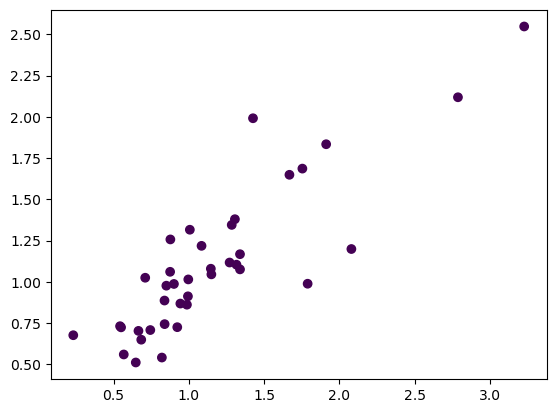

In [11]:
plt.scatter(X_test.iloc[:,2],X_test.iloc[:,3],c=predictions)

Accuracy score: 0.8974358974358975


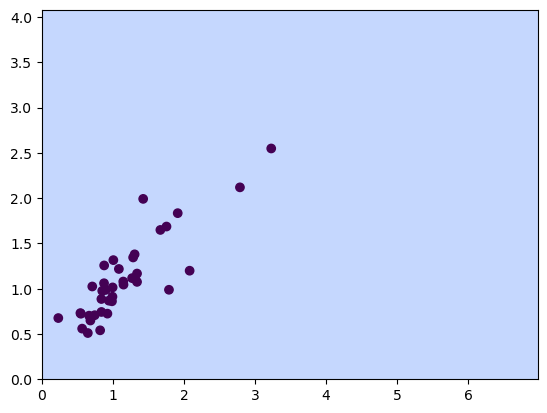

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca= pca.transform(X_test)

#model = SVC(kernel='linear', probability=True)
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)
predictions = model.predict(X_test_pca)
print(f"Accuracy score: {accuracy_score(y_test, predictions)}")

x1,x2=np.meshgrid(np.arange(0,7,0.02),np.arange(0,4.1,0.02))
Z=model.predict(np.c_[x1.ravel(),x2.ravel()])
Z=Z.reshape(x1.shape)
plt.contourf(x1,x2,Z,cmap=plt.cm.coolwarm,alpha=0.5)
plt.scatter(X_test.iloc[:,2],X_test.iloc[:,3],c=predictions)
#plt.scatter(X_test.iloc[:,2],X_test.iloc[:,3],c=predictions-y_test) 檢查預測錯誤的sample
plt.show()

In [17]:
df = pd.read_csv(r'C:\Users\user\Desktop\FLD\data_classify_Steps6\glrlm+glszm+gldm0613.csv')
exp_cols = df.columns.values
exp_cols

array(['original_glszm_GrayLevelNonUniformity',
       'original_glszm_GrayLevelNonUniformityNormalized',
       'original_glszm_GrayLevelVariance',
       'original_glszm_HighGrayLevelZoneEmphasis',
       'original_glszm_LargeAreaEmphasis',
       'original_glszm_LargeAreaHighGrayLevelEmphasis',
       'original_glszm_LargeAreaLowGrayLevelEmphasis',
       'original_glszm_LowGrayLevelZoneEmphasis',
       'original_glszm_SizeZoneNonUniformity',
       'original_glszm_SizeZoneNonUniformityNormalized',
       'original_glszm_SmallAreaEmphasis',
       'original_glszm_SmallAreaHighGrayLevelEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
       'original_glszm_ZoneVariance',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_GrayLevelNonUniformityNormalized',
       'original_glrlm_GrayLevelVariance',
       'original_glrlm_HighGrayLevelRunEmphasis',
       'original_glrlm_LongRunE

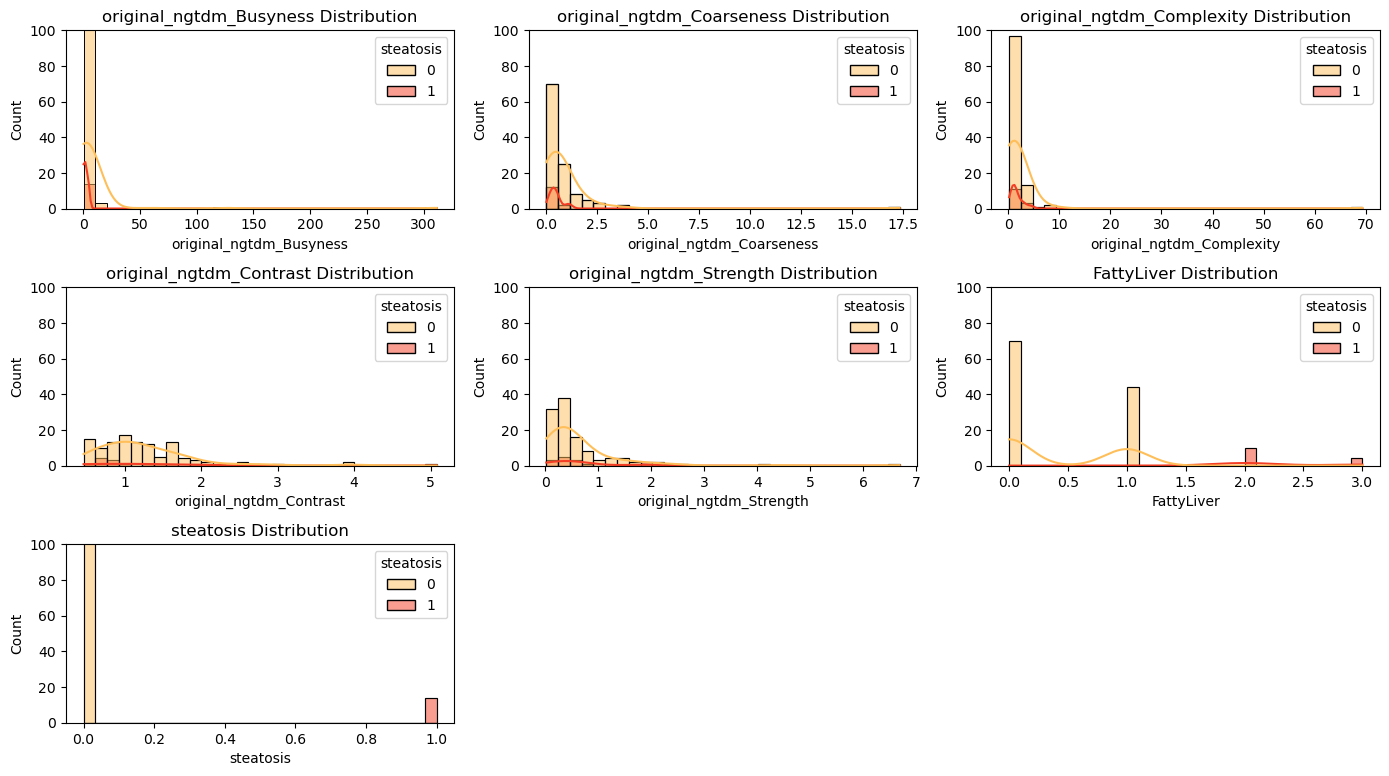

In [59]:
import seaborn as sns
df = pd.read_csv(r'C:\Users\user\Desktop\FLD\data_classify_Steps6\ngtdm20230519.csv')
exp_cols = df.columns.values
#num_data = train.select_dtypes(exclude=['object']).copy()

plt.figure(figsize=(14,10))
for idx,column in enumerate(exp_cols):
    plt.subplot(4,3,idx+1)
    sns.histplot(x=column, hue="steatosis", data=df,bins=30,kde=True,palette='YlOrRd')
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()